# Upload Files Using Dash

dash Upload takes file to be uploaded as Input and encodes it into Base64 script. In order to get the file, we will have to decode the base64 string to a file. The saved file can be further used.

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Apr/2021 14:37:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2021 14:37:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2021 14:37:03] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2021 14:37:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2021 14:37:10] "POST /_dash-update-component HTTP/1.1" 200 -




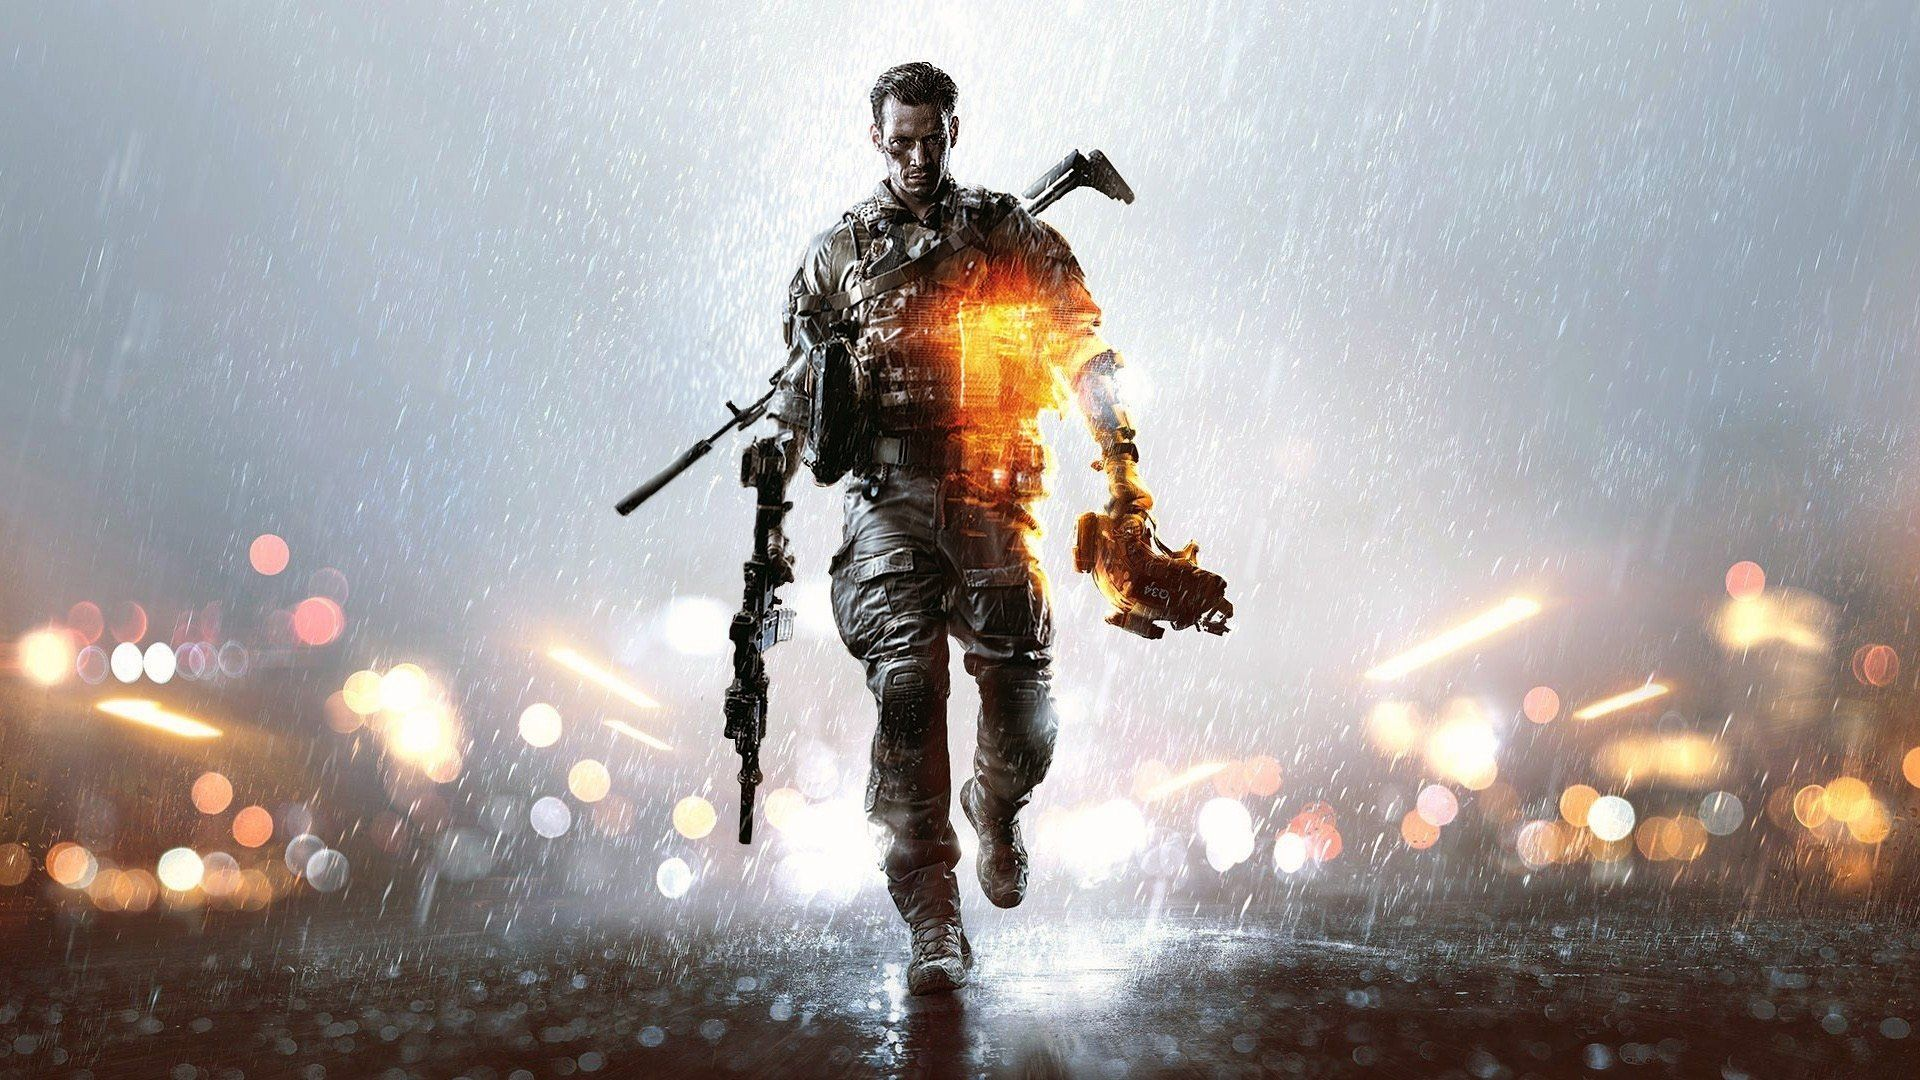

In [ ]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table

import pandas as pd
from PIL import Image

gcontents = ''

app = dash.Dash(__name__, )

app.layout = html.Div([
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        # Allow multiple files to be uploaded
        multiple=True
    ),
    html.Div(id='output-data-upload'),
])


def parse_contents(contents, filename, date):
    
    content_type, content_string = contents.split(',')

    decoded = base64.b64decode(content_string)
    
    #If you want to save the file
    decodeit = open(filename, 'wb')
    decodeit.write(decoded)
    decodeit.close()
    
    print(contents)
    
    return html.Div([
        html.H5(filename),
        html.H6(datetime.datetime.fromtimestamp(date)),
        html.Img(src = contents)   #Use to show image directly

        
    ])


@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'),
              State('upload-data', 'last_modified'))
def update_output(list_of_contents, list_of_names, list_of_dates):
    if list_of_contents is not None:
        children = [
            parse_contents(c, n, d) for c, n, d in
            zip(list_of_contents, list_of_names, list_of_dates)]
        return children



if __name__ == '__main__':
    app.run_server()